In [239]:
# Get the Natural Language Processing Toolkit
import nltk

# Get the data science package Pandas
import pandas as pd

# Get the library matplotlib for making pretty charts
import matplotlib as plt

# Make plots appear here in this notebook
%matplotlib inline

# This just makes the plot size bigger, so that we can see it easier. 
plt.rcParams['figure.figsize'] = (12,4)

# Get all the example books from the NLTK textbook
from nltk.book import *

In [238]:
# Let's explore these texts a little. 
# There are lots of things we can do with these texts. 
# To see a list, type text1. and press <Tab>
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [5]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [6]:
# But what if we get tired of doing that for each text, and want to do it with all of them? 
# Put the texts into a list.
alltexts = [text1, text2, text3, text4, text5, text6, text8, text9]

In [7]:
# Let's look at it to make sure it's all there. 
alltexts

[<Text: Moby Dick by Herman Melville 1851>,
 <Text: Sense and Sensibility by Jane Austen 1811>,
 <Text: The Book of Genesis>,
 <Text: Inaugural Address Corpus>,
 <Text: Chat Corpus>,
 <Text: Monty Python and the Holy Grail>,
 <Text: Personals Corpus>,
 <Text: The Man Who Was Thursday by G . K . Chesterton 1908>]

In [8]:
for text in alltexts: 
    text.collocations()
    print('---')

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand
---
Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning
---
said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast
---
United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citize

In [9]:
text6.concordance('shrubbery')

Displaying 13 of 13 matches:
want ? HEAD KNIGHT : We want ... a shrubbery ! [ dramatic chord ] ARTHUR : A wh
ase ! No more ! We will find you a shrubbery . HEAD KNIGHT : You must return he
IGHT : You must return here with a shrubbery or else you will never pass throug
d fair , and we will return with a shrubbery . HEAD KNIGHT : One that looks nic
 in this town where we could buy a shrubbery ? [ dramatic chord ] OLD CRONE : W
 do not tell us where we can buy a shrubbery , my friend and I will say ... we 
s of Ni , we have brought you your shrubbery . May we go now ? HEAD KNIGHT : It
o now ? HEAD KNIGHT : It is a good shrubbery . I like the laurels particularly 
irstly , you must find ... another shrubbery ! [ dramatic chord ] ARTHUR : Not 
matic chord ] ARTHUR : Not another shrubbery ! RANDOM : Ni ! HEAD KNIGHT : Then
T : Then , when you have found the shrubbery , you must place it here beside th
you must place it here beside this shrubbery , only slightly higher so you get 
T : Then , 

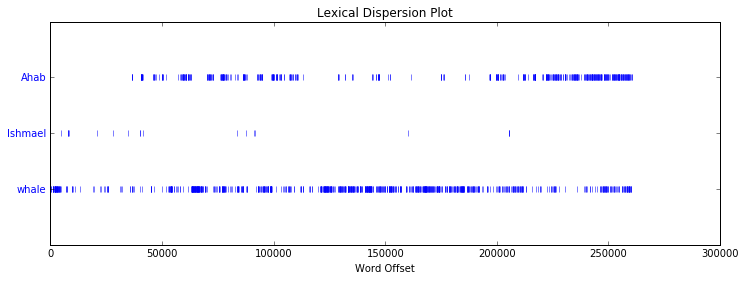

In [10]:
text1.dispersion_plot(['Ahab', 'Ishmael', 'whale'])

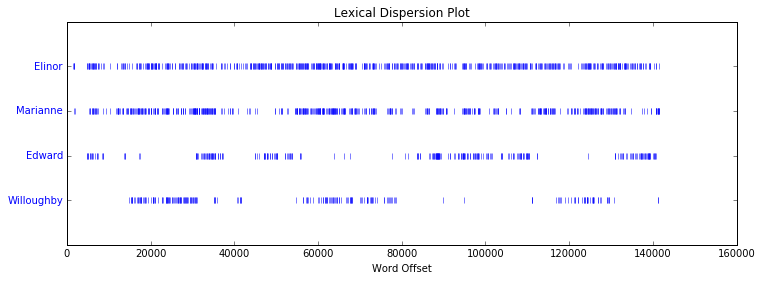

In [11]:
text2.dispersion_plot(['Elinor', 'Marianne', 'Edward', 'Willoughby'])

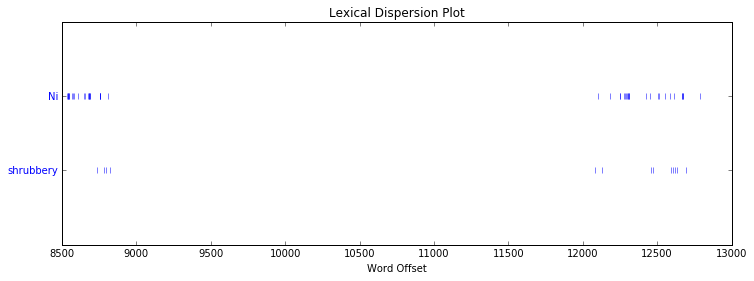

In [142]:
text6.dispersion_plot(['Ni', 'shrubbery'])

In [12]:
# Put the texts and their wordcounts into a lookup table
lengths = {text.name: len(text) for text in alltexts}

In [13]:
lengths

{'Chat Corpus': 45010,
 'Inaugural Address Corpus': 145735,
 'Moby Dick by Herman Melville 1851': 260819,
 'Monty Python and the Holy Grail': 16967,
 'Personals Corpus': 4867,
 'Sense and Sensibility by Jane Austen 1811': 141576,
 'The Book of Genesis': 44764,
 'The Man Who Was Thursday by G . K . Chesterton 1908': 69213}

In [14]:
pd.Series(lengths)

Chat Corpus                                             45010
Inaugural Address Corpus                               145735
Moby Dick by Herman Melville 1851                      260819
Monty Python and the Holy Grail                         16967
Personals Corpus                                         4867
Sense and Sensibility by Jane Austen 1811              141576
The Book of Genesis                                     44764
The Man Who Was Thursday by G . K . Chesterton 1908     69213
dtype: int64

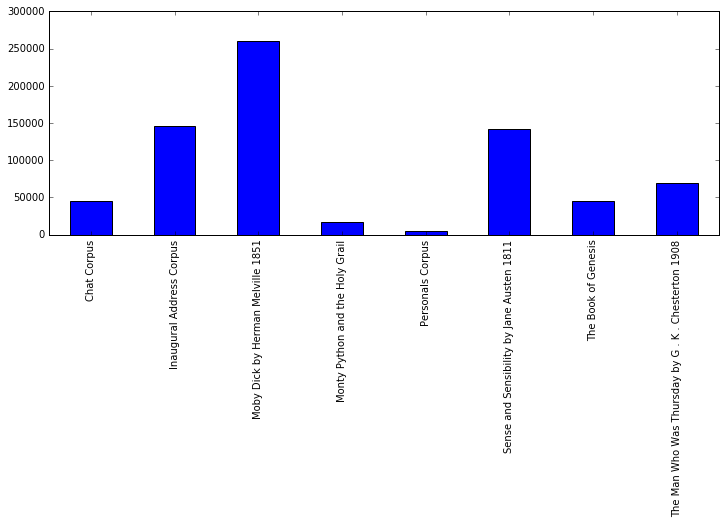

In [15]:
pd.Series(lengths).plot(kind='bar')

In [20]:
# That in itself is not very interesting. 
# So let's see if we can not only count the words, but count the vocabulary
# of a text.
# To do that, we can use `set()`, which will count every word once. 
porky_sentence = "the the the the the that's all folks"
porky_words = sentence.split()
porky_words

['the', 'the', 'the', 'the', 'the', "that's", 'all', 'folks']

In [21]:
# We can count the words in the sentence easily: 
len(porky_words)

8

In [25]:
# To count the words, but ignore repeated words, we can use the function set(). 
set(porky_words)

{'all', 'folks', "that's", 'the'}

In [26]:
# So if we count this set, we can determine the vocabulary of a text. 
len(set(porky_words))

4

In [29]:
# Let's see if we can find the vocabulary of Moby Dick.
len(set(text1))

19317

In [53]:
# Pretty big, but then again, Moby Dick is kind of a long novel. 
# We can adjust for the words by adjusting for the total words: 
len(text1) / len(set(text1))

13.502044830977896

In [67]:
# This would get tedious if we did this for every text, 
# so let's write a function!
def vocab(text): 
    return len(text) / len(set(text))

In [68]:
vocab(porky_words)

2.0

In [69]:
# Let's go through each text, and get its vocabulary, and put it in a table. 
vocabularies = {text.name: vocab(text) for text in alltexts}

In [72]:
# Let's put that table into Pandas so we can see it better: 
pd.Series(vocabularies)

Chat Corpus                                             7.420046
Inaugural Address Corpus                               14.941050
Moby Dick by Herman Melville 1851                      13.502045
Monty Python and the Holy Grail                         7.833333
Personals Corpus                                        4.392599
Sense and Sensibility by Jane Austen 1811              20.719450
The Book of Genesis                                    16.050197
The Man Who Was Thursday by G . K . Chesterton 1908    10.167915
dtype: float64

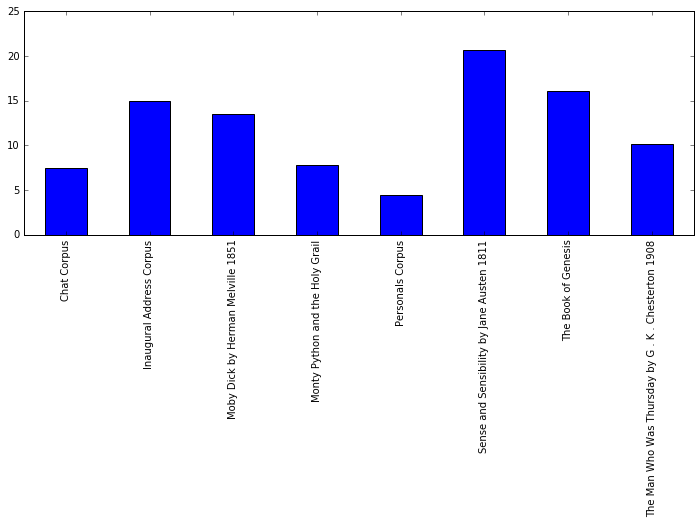

In [73]:
# Now let's plot that. 
pd.Series(vocabularies).plot(kind='bar')

In [122]:
# OK, now let's make a famous wordcloud
from wordcloud import WordCloud

/usr/lib/python3.5/site-packages/PIL/ImageDraw.py:99: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


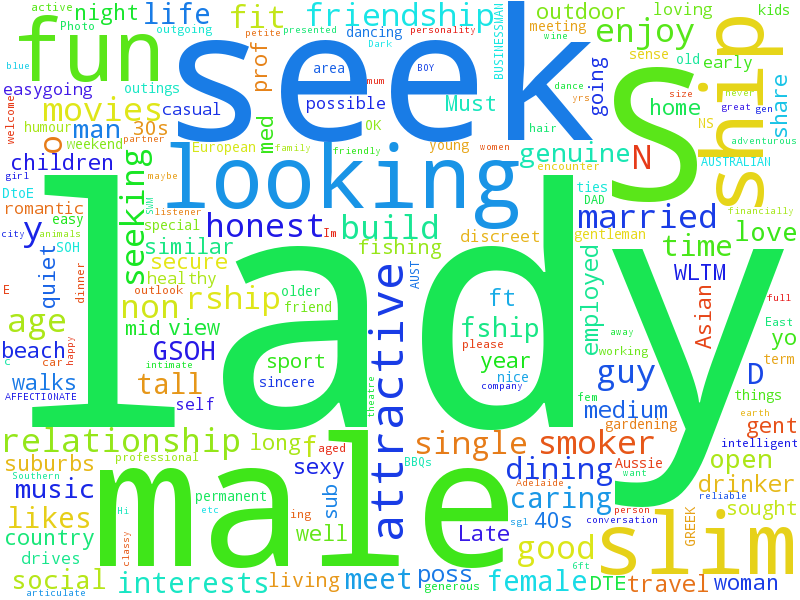

In [251]:
rawtext = ' '.join(text8.tokens) # Stitch it back together. 
wc = WordCloud(width=800, height=600, background_color='white')
wc.generate(rawtext).to_image()

In [197]:
# Now let's take a look at the inaugural address corpus in detail. 
from nltk.corpus import inaugural

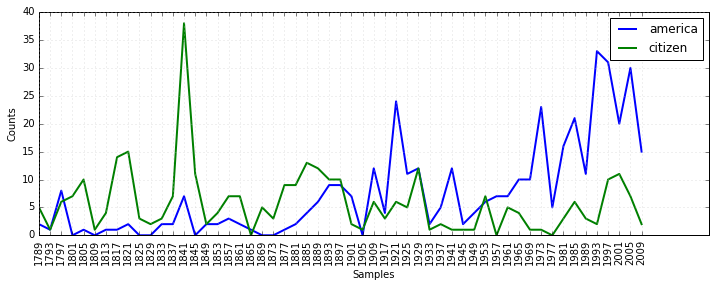

In [198]:
# Now let's set up a conditional word frequency distribution for it, 
# pairing off a list of words with the list of inaugural addresses. 
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

In [232]:
# Let's play around with the Brown corpus. 
# It's a categorized text corpus. Let's see all the categories: 
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [233]:
# Now let's create another conditional frequency distribution, 
# this time based on these genres. 
genres = ['adventure', 'romance', 'science_fiction']
words = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in words)

In [234]:
cfdist

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'adventure': FreqDist({'can': 46,
                               'could': 151,
                               'may': 5,
                               'might': 58,
                               'must': 27,
                               'will': 50}),
                     'romance': FreqDist({'can': 74,
                               'could': 193,
                               'may': 11,
                               'might': 51,
                               'must': 45,
                               'will': 43}),
                     'science_fiction': FreqDist({'can': 16,
                               'could': 49,
                               'may': 4,
                               'might': 12,
                               'must': 8,
                               'will': 16})})

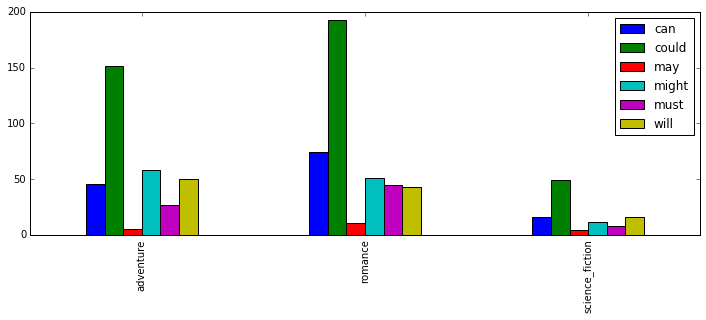

In [235]:
pd.DataFrame(cfdist).T.plot(kind='bar')